<a href="https://colab.research.google.com/github/DeisyW/Talento_Tech/blob/main/Laboratorio1_TalentoTech_DWR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio # 1

### Temas: Limpieza de Datos, análisis de negocio, integración de fuentes de datos

# 1. El problema del negocio

Una entidad bancaria contrata a una empresa de marketing encargada de contactar telefónicamente a posibles clientes para determinar si están interesados o no en adquirir un certificado de depósito a término con el banco.

¿Qué perfil tienen los clientes con mayor potencial de conversión?

#2. El set de datos

La información recolectada por la empresa de mercadeo se encuentra en un archivo CSV (`dataset_banco.csv`) con 45215 filas y 17 columnas.

Cada registro contiene 16 características (las primeras 16 columnas) y una categoría ("yes" o "no" dependiendo de si la persona está o no interesada en adquirir el producto). Las columnas son:

1. "age":  edad (numérica)
2. "job": tipo de trabajo (categórica: "admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar","self-employed", "retired", "technician", "services")
3. "marital": estado civil (categórica: "married", "divorced", "single")
4. "education": nivel educativo (categórica: "unknown", "secondary", "primary", "tertiary")
5. "default": si dejó de pagar sus obligaciones (categórica: "yes", "no")
6. "balance": saldo promedio anual de ingresos en euros (numérica)
7. "housing": ¿tiene o no crédito hipotecario? (categórica: "yes", "no")
8. "loan": ¿tiene créditos de consumo? (categórica: "yes", "no")
9. "contact": medio a través del cual fue contactado (categórica: "unknown", "telephone", "cellular")
10. "day": último día del mes en el que fue contactada (numérica)
11. "month": último mes en el que fue contactada (categórica: "jan", "feb", "mar", ..., "nov", "dec")
12. "duration": duración (en segundos) del último contacto (numérica)
13. "campaign": número total de veces que fue contactada durante la campaña (numérica)
14. "pdays": número de días transcurridos después de haber sido contactado antes de la campaña actual (numérica. -1 indica que no fue contactado previamente)
15. "previous": número de veces que ha sido contactada antes de esta campaña (numérica)
16. "poutcome": resultado de la campaña de marketing anterior (categórica: "unknown", "other", "failure", "success")
17. "y": categoría ¿el cliente se suscribió a un depósito a término? (categórica: "yes", "no")

#3. Una primera mirada al dataset

In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt  #libreria matplotlib tiene facilidades para gráficar
import seaborn as sns  # librerias para gráficar



In [ ]:
# Lectura
from google.colab import drive
drive.mount('/content/drive')

ruta = "/content/drive/MyDrive/Colab Notebooks/dataset_banco.csv"
data = pd.read_csv(ruta)

# varias formas de subir archivo.. directamente
#from google.colab import files
#uploaded = files.upload()
# aqui pide cuales archivos subir desde mi PC!!

# carga datos sin autorizacion en carpeta de sample es otra forma
# data = pd.read_csv(ruta)


Mounted at /content/drive


In [ ]:
#proporciona visualización y exploración de datos con el dataset cargado
# presenta 20 primeros

print(data.shape)  # muestra el total de registros y total de columnas
data.head(5)
data.tail(5)


(45215, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45210,51,technician,married,tertiary,no,825.0,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes
45212,72,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,yes
45213,57,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,no
45214,37,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361.0,2,188.0,11,other,no


# **Visualización y Exploración de Datos:**


*   df.head(): Muestra las primeras filas del DataFrame.
*   df.tail(): Muestra las últimas filas del DataFrame.
*   df.info(): Muestra información sobre el DataFrame, incluyendo tipos de datos y valores no nulos.
*   df.describe(): Proporciona estadísticas descriptivas para columnas numéricas.
*   df.shape: Devuelve una tupla con la cantidad de filas y columnas del DataFrame.
*   df.columns: Devuelve una lista con los nombres de las columnas del DataFrame.

## Transformación de nombres de atributos

In [ ]:
#cambia los nombres de las columnas del dataframe, lo asigna a otro dataframe
data_rename = data.rename (columns = {'age' : 'Edad',
                                      'job' : 'Trabajo',
                                      'marital' : 'Estado_Civil',
                                      'education' : 'Educacion',
                                      'default' : 'Morosidad',
                                      'balance' : 'Saldo',
                                      'housing' : 'Vivienda',
                                      'loan': 'Prestamo',
                                      'contact' : 'Contacto',
                                      'day': 'Dia',
                                      'month' : 'Mes',
                                      'duration' : 'Duracion',
                                      'campaign' : 'Campana',
                                      'pdays' : 'Dias_previos',
                                      'previous' : 'Anterior',
                                      'poutcome' : 'Resultado_previo',
                                      'y' :'Respuesta'} )

print (data_rename)
# data.columns = ['Edad' ,.... ] se colocan en orden las columnas para renombrarlas
#consultar datos edad mayor a 65
data.query("age > 65")

       Edad       Trabajo Estado_Civil  Educacion Morosidad   Saldo Vivienda  \
0        58    management      married   tertiary        no  2143.0      yes   
1        44    technician       single  secondary        no    29.0      yes   
2        33  entrepreneur      married  secondary        no     2.0      yes   
3        47   blue-collar      married    unknown        no  1506.0      yes   
4        33       unknown       single    unknown        no     1.0       no   
...     ...           ...          ...        ...       ...     ...      ...   
45210    51    technician      married   tertiary        no   825.0       no   
45211    71       retired     divorced    primary        no  1729.0       no   
45212    72       retired      married  secondary        no  5715.0       no   
45213    57   blue-collar      married  secondary        no   668.0       no   
45214    37  entrepreneur      married  secondary        no  2971.0       no   

      Prestamo   Contacto  Dia  Mes  Du

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
229,530,services,divorced,secondary,no,1467.0,yes,no,unknown,5,may,124.0,1,-1.0,0,unknown,no
1076,490,services,single,primary,no,114.0,yes,no,unknown,7,may,99.0,2,-1.0,0,unknown,no
2229,123,student,single,tertiary,no,250.0,yes,no,unknown,12,may,166.0,2,-1.0,0,unknown,no
3018,332,admin.,single,secondary,no,91.0,yes,no,unknown,14,may,302.0,2,-1.0,0,unknown,no
5799,311,self-employed,single,secondary,no,360.0,yes,no,unknown,26,may,592.0,4,-1.0,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,75,retired,divorced,tertiary,no,3810.0,yes,no,cellular,16,nov,262.0,1,183.0,1,failure,yes
45198,68,retired,married,secondary,no,1146.0,no,no,cellular,16,nov,212.0,1,187.0,6,success,yes
45208,73,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300.0,1,40.0,8,failure,yes
45211,71,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,yes


In [ ]:
#visualiza las primeras líneas de tu .csv

In [ ]:
#visualiza las variables categóricas y las numéricas

categoricas = data_rename.select_dtypes(include=['object']).columns.tolist()
numericas = data_rename.select_dtypes(include=['int64','float64']).columns.tolist()

categoricas = data.select_dtypes(include=['object']).columns.tolist()
numericas = data.select_dtypes(include=['int64','float64']).columns.tolist()


print('Caracteristicas', categoricas)
print('Valores numericos', numericas)

pd.value_counts(data['job']) # presenta los diferentes valores de job, y cuantos registros hay de cada valor


Caracteristicas ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Valores numericos ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


job
blue-collar       9731
management        9455
technician        7599
admin.            5168
services          4153
retired           2263
self-employed     1578
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
unknown            288
administrative       3
Management           2
MANAGEMENT           2
Self-employed        1
Services             1
Retired              1
Name: count, dtype: int64

In [ ]:
#proporciona estadísticas descriptivas para columnas numéricas contador, promedio, desviación standar, minimo, maximo... etc
data_rename.describe()

,Edad,Saldo,Dia,Duracion,Campana,Dias_previos,Anterior
count,45215.000000,45213.000000,45215.000000,45214.000000,45215.000000,45214.000000,45215.000000
mean,41.004711,1374.159866,15.805839,258.074357,2.763729,40.192485,0.580383
std,12.036647,3924.255525,8.322473,257.605175,3.097910,100.120622,2.303438
min,18.000000,-8019.000000,1.000000,-1389.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,776.000000,527532.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
## Realizar proceso de limpieza
# datos faltantes
# columnas irrelevantes
#

data_rename.isna().sum() # cuantos valores son nulos isna: si hay N.A. NaN
#data_rename.describe()



Edad                0
Trabajo             2
Estado_Civil        1
Educacion           1
Morosidad           0
Saldo               2
Vivienda            0
Prestamo            0
Contacto            0
Dia                 0
Mes                 0
Duracion            1
Campana             0
Dias_previos        1
Anterior            0
Resultado_previo    0
Respuesta           0
dtype: int64

In [ ]:

data_rename.dropna(inplace=True) # borra los N.A ... TRUE:los cambia
data.count()

# devuelve la longitud de cada uno de los valores de la columna Educacion
data_rename['Educacion'].apply(len)


0        8
1        9
2        9
3        7
4        7
        ..
45210    8
45211    7
45212    9
45213    9
45214    9
Name: Educacion, Length: 45207, dtype: int64

## Columnas irrelevantes

Columnas que no son importante para el análisis
Columnas que todas tienen un valor o un solo nivel...
Columnas con info redundante


In [ ]:
cols_cat = ['Edad', 'Estado_Civil','Educacion','Morosidad','Prestamo', 'Contacto', 'Mes', 'Resultado_previo', 'Respuesta']

# cuenta los valores diferentes/unicos que toma cada columna categorica  = "subniveles"
for col in cols_cat:
  print(f'Columna_{col}: {data_rename[col].nunique()} subniveles')  # el parametro f, indica en print que tome string o variables, es un f-string

#pd.value_counts(data_rename['Trabajo'])  cuenta los valores de cada valor de caracteristica

Columna_Edad: 85 subniveles
Columna_Estado_Civil: 6 subniveles
Columna_Educacion: 10 subniveles
Columna_Morosidad: 2 subniveles
Columna_Prestamo: 6 subniveles
Columna_Contacto: 5 subniveles
Columna_Mes: 12 subniveles
Columna_Resultado_previo: 6 subniveles
Columna_Respuesta: 2 subniveles


In [ ]:
des_std = data_rename[['Dias_previos']].std() #calcula la desviacion estandar de dias_previos
print(des_std)

des_std_todos = data_rename[['Edad', 'Saldo', 'Dia', 'Duracion','Campana','Dias_previos','Anterior']].std() #calcula la desviacion estandar
print(des_std_todos)


Dias_previos    100.103283
dtype: float64
Edad              12.037399
Saldo           3924.491665
Dia                8.323015
Duracion         257.460759
Campana            3.098058
Dias_previos     100.103283
Anterior           2.303341
dtype: float64


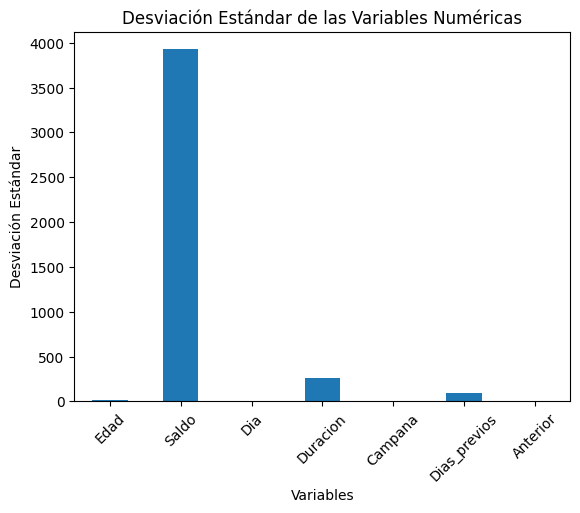

In [ ]:
# graficas con la libreria Matplotlib
# Crear una gráfica de barras para representar las desviaciones estándar
des_std_todos.plot(kind='bar')
plt.title('Desviación Estándar de las Variables Numéricas')
plt.xlabel('Variables')
plt.ylabel('Desviación Estándar')
plt.xticks(rotation=45)
plt.show()

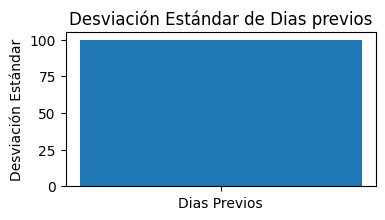

In [ ]:
# Graficar la desviación estándar de Dias_previos

plt.figure(figsize=(4, 2))  # Configura el tamaño de la figura
plt.bar('Dias Previos', des_std)  # Crea una barra para la desviación estándar de 'pdays'
plt.title('Desviación Estándar de Dias previos')
plt.ylabel('Desviación Estándar')
plt.show()

In [ ]:
# Calcula la media del atributo "Dias Previos: dias de contacto al usuario antes de la campaña actual"
media_diasP = data_rename['Dias_previos'].mean()

print("Promedio de dias de contacto:", media_diasP)

Promedio de dias de contacto: 40.17822461123277


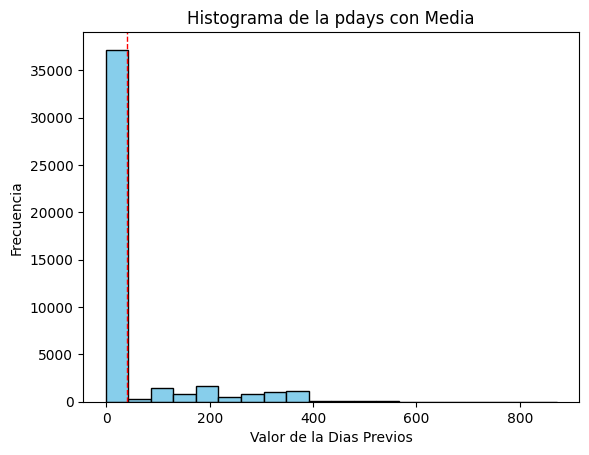

In [ ]:
# Graficar un histograma del atributo "Dias_Previos"

plt.hist(data_rename['Dias_previos'], bins=20, color='skyblue', edgecolor='black')

# Agregar una línea vertical para mostrar la media -- con cual parametro se indica eso??
plt.axvline(media_diasP, color='red', linestyle='dashed', linewidth=1)

# Etiquetas y título
plt.xlabel('Valor de la Dias Previos')
plt.ylabel('Frecuencia')
plt.title('Histograma de la pdays con Media')

# Mostrar la gráfica
plt.show()